# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [171]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
from matplotlib import style
style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)


# Create two new dataframes
northdf = pd.read_csv("NorthCallCenter.csv")
southdf = pd.read_csv("SouthCallCenter.csv")


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [172]:
#Code Used:
northdf['Rep ID'].value_counts()


Brent     37
Lilly     30
Todd      29
Duke      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
Name: Rep ID, dtype: int64

#### EDA Question 1B:  How many reps are in the South branch?  

In [173]:
#Code Used:
southdf['Rep ID'].value_counts()

Eric      35
Randy     33
Sandy     32
Helga     31
Kate      29
George    29
Karl      28
Susan     26
Josh      26
Sharon    25
Alice     20
Name: Rep ID, dtype: int64

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [174]:
#Code Used:
north_avg = northdf[['Busy Minutes', 'Not Ready Minutes','Incoming Wait Time', 'During Call Wait Time']].mean()
print(north_avg)

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [175]:
#Code Used:
south_avg = southdf[['Busy Minutes', 'Not Ready Minutes','Incoming Wait Time', 'During Call Wait Time']].mean()
print(south_avg)

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [176]:

# Code Used:
#ntime_block = northdf.groupby('Time Block')['Calls'].value_counts().unstack()
#stime_block = southdf.groupby('Time Block')['Calls'].value_counts().unstack()
#total_time_block = northdf[["Time Block", "Calls"]].merge(southdf[["Time Block"]], 
        #left_on = 'Calls', right_on = 'Time Block')
total_df = northdf.merge(southdf, how="outer")
time_blocks = total_df.groupby('Time Block')['Calls'].value_counts()
time_blocks



Time Block  Calls
10:00 AM    1         99
11:00 AM    1         56
12:00 PM    1        120
1:00 PM     1         40
2:00 PM     1         65
3:00 PM     1         73
4:00 PM     1         53
5:00 PM     1         43
9:00 AM     1         10
Name: Calls, dtype: int64

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
Busy Minutes             9.99
Not Ready Minutes        1.91
Incoming Wait Time       3.05
During Call Wait Time    2.97
dtype: float64
- 2b) South Branch, (round to the nearest hundredth):
Busy Minutes             10.05
Not Ready Minutes         1.91
Incoming Wait Time        3.00
During Call Wait Time     3.08
- 3) Total Calls taken for all branches per time block:

Time Block     
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

In [177]:
# import pandas as pd
# import numpy as np 
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.set(color_codes=True)

northdf = pd.read_csv("NorthCallCenter.csv")
southdf = pd.read_csv("SouthCallCenter.csv")
total_df = northdf.merge(southdf, how="outer")
total_df.head()
total_df.tail()

total_df.shape

(559, 15)

In [178]:
#Here I'm running code to discover the total percentage of empty cells.

total_cells = np.prod(total_df.shape)

missing_cells = pd.isnull(total_df).sum()

total_missing = missing_cells.sum()

percentage_missing = round((total_missing/total_cells), 2) *100

(percentage_missing, "is the total percentage missing") 

f"{percentage_missing = }"



'percentage_missing = 4.0'

<AxesSubplot:>

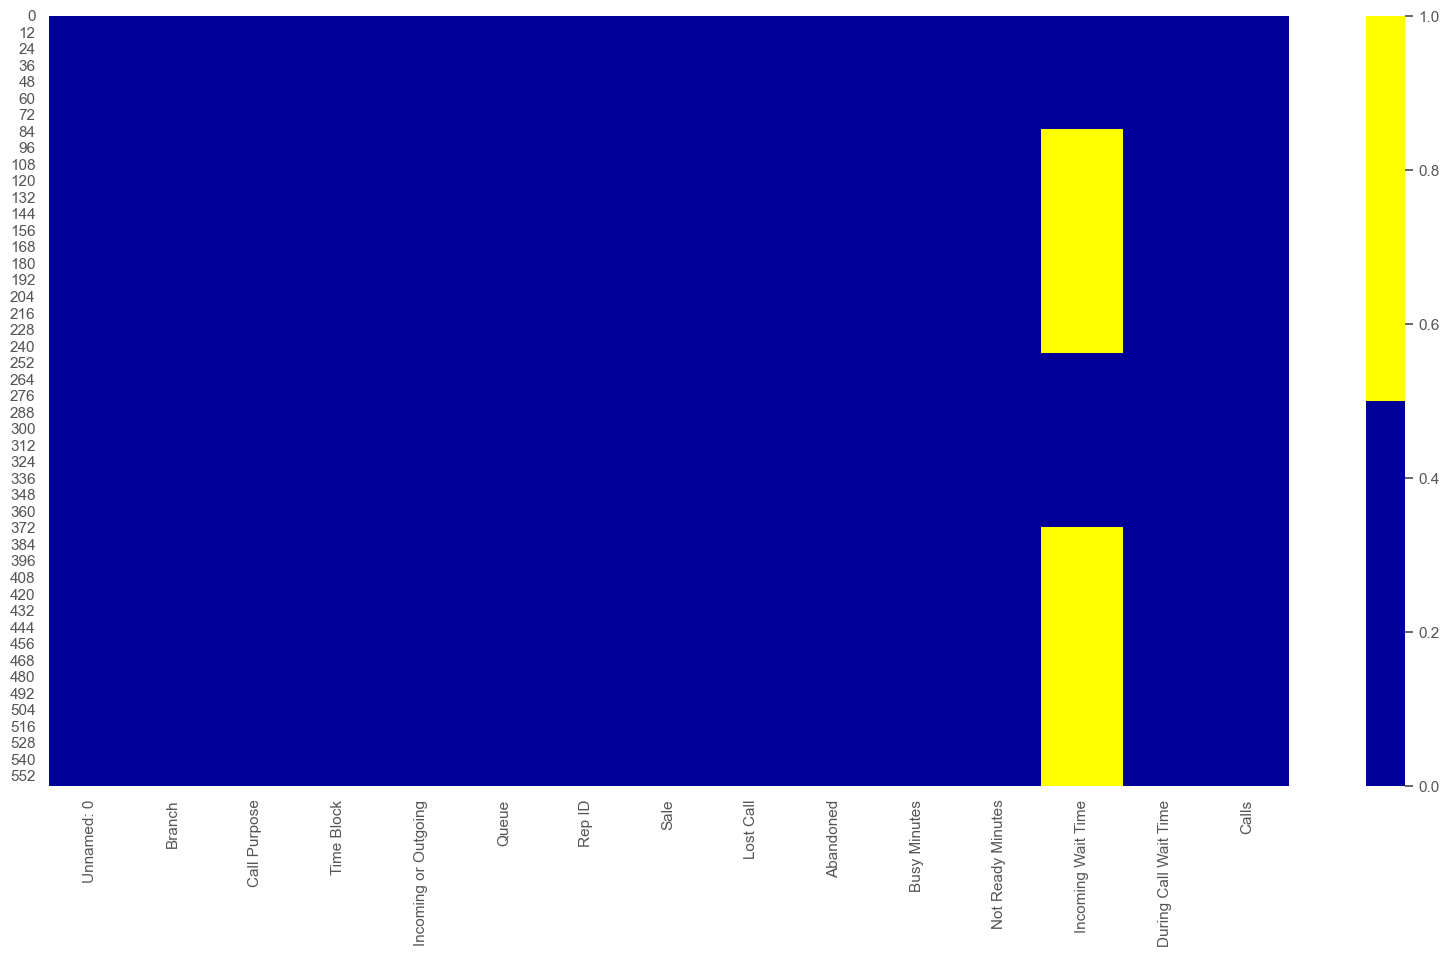

In [179]:
#Here I am lookin to address the missing data. There is a small amount of data missing,
#but it's important that I see where this data is missing. 


cols = total_df.columns[:50]
colours = ['#000099', '#ffff00']
sns.heatmap(total_df[cols].isnull(), cmap=sns.color_palette(colours))

#Clearly, based on this heatmap, our missing data is concentrated in the 
#'Incoming Wait Time' column. Values are missing from rows in the mid-80s through the mid-200s
#and again from about the 375th row to the end of the data set. 


In [180]:
for col in total_df.columns:
    pct_missing = np.mean(total_df[col].isnull())
    print('{}-{}%'.format(col, round(pct_missing*100)))
#Another way to pinpoint just how much data is missing from this column
#and to confirm that my eyes have not tricked me regarding other columns
#is to run this list of pecentage missing values for each
#feature. This confirms that we are only missing data from the 'Incoming Wait Time'
#feature and exactly how much data is missing. 


Unnamed: 0-0%
Branch-0%
Call Purpose-0%
Time Block-0%
Incoming or Outgoing-0%
Queue-0%
Rep ID-0%
Sale-0%
Lost Call-0%
Abandoned-0%
Busy Minutes-0%
Not Ready Minutes-0%
Incoming Wait Time-63%
During Call Wait Time-0%
Calls-0%


In [181]:
northdf['Sale'].unique()

array(['NO', 'YES ', 'YES'], dtype=object)

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: There is a significant amount of data (63%) missing from the "Incoming Wait Time" feature. This feature calculates the time a customer would wait after a rep is available to take their call. The reason this data is missing, is because these calls are OUTGOING, meaning there is no "Incoming Wait Time." This factor is critical for understanding employee efficiency!

#As a result, I would want to replace the missing value with a value of 0. This indicates that there was no "Incoming Wait Time" for the customer on the call. It's not null because nobody collected the data. As a result, the answer should be converted to match the other data in the category. In this case, the data type is a float. 

In [182]:
# Code Used
# Add Additional Cells as needed.
total_df['Incoming Wait Time'] = total_df['Incoming Wait Time'].fillna(0.0)


#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: You rectify the issue because the computer sees these as separate unique values/descriptors. You do this by replacing one string so both are consistent. In this case, I think it makes senese to change the "YES " to "YES". 

In [183]:
#Code Used
# Add Additional Cells as needed.
northdf_new = northdf.replace('YES ', 'YES')
northdf_new['Sale'].unique()


array(['NO', 'YES'], dtype=object)

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: In looking for duplicates in both key features and all features, I cannot find evidence of duplicated data. 

In [184]:
#Code Used
# Add Additional Cells as needed.
total_df = northdf_new.merge(southdf, how="outer")
ns_df_dedupped = total_df.drop('Sale', axis =1).drop_duplicates()

print(total_df.shape)
print(ns_df_dedupped.shape)

(559, 15)
(559, 14)


In [185]:
duplicate = total_df[total_df.duplicated()]
print("Duplicated Rows :")
duplicate

Duplicated Rows :


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [186]:
#Here I am going to select and drop duplicates based on the 
#occurrence based on all cloumns, except the last occurrence based
#on all columns.
df_dedupped_2 = duplicate.drop_duplicates(keep = 'last')

print(total_df.shape)
print(df_dedupped_2.shape)

(559, 15)
(0, 15)


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: The last column is not necessary as it only contains one value - the number 1. This is unnecessary as each row is meant to represent one call. HOWEVER, having this column makes calculations easier in the data manipulation section. 

In [187]:
#Code Used
# Add Additional Cells as needed.
#Here I'm looking to see how many unique values are in each column.
#This will help me to understand if the column is necessary. 
for col in total_df:
    print(total_df[col].unique())

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [188]:
#Additionally, I believe lost calls should be removed
#from the data set, as they do not help us to better understand
#employee efficiency. Additionally, they are highly infrequent. 
#I also deletd the unnamed column "O" as it was a redundancy with the
#existing numbering. 
total_df.rename({"Unnamed: 0":"a"}, axis = "columns", inplace = True)
df = total_df.drop(columns = ['Lost Call', 'Calls','a'])

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [189]:
# Create dataframe for the entire company named df
df = total_df.drop(columns = ['Lost Call','a'])
df.head()



,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,8,2,1.0,4,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent
- South Branch = Eric


In [190]:
# Code Used
# Add Additional Cells as needed.
northdf.groupby(by=['Rep ID'])['Calls'].sum().nlargest()


Rep ID
Brent    37
Lilly    30
Duke     29
Todd     29
Joe      26
Name: Calls, dtype: int64

In [191]:
southdf.groupby(by=['Rep ID'])['Calls'].sum().nlargest()

Rep ID
Eric      35
Randy     33
Sandy     32
Helga     31
George    29
Name: Calls, dtype: int64

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86
- South Branch = 1.27
- Company Wide = 1.97
- Do any of these fall out of the optimal range of 2-5%? Yes. 

In [192]:
# Code Used
# Add Additional Cells as needed.
N_Aban_total = northdf['Abandoned'].sum()
N_call_total = northdf['Calls'].sum()
nb_abandonment = (N_Aban_total/N_call_total*100).round(2)
(nb_abandonment, 'percent is the average call abandonment rate for the North Branch.')

(2.86, 'percent is the average call abandonment rate for the North Branch.')

In [193]:
sb_abandonment = (southdf['Abandoned'].sum()/southdf['Calls'].sum()*100).round(2)
(sb_abandonment, 'percent is the average call abandonment rate for the South Branch.')

(1.27, 'percent is the average call abandonment rate for the South Branch.')

In [194]:
df
df_abandonment = (df['Abandoned'].sum()/df['Calls'].sum()*100).round(2)
(df_abandonment, 'percent is the average call abandonment rate for the total company.')

(1.97, 'percent is the average call abandonment rate for the total company.')

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 33 calls; 40.24%
- South Branch = 48 calls; 38.1%
- Company Wide = 81 calls; 38.49%

In [195]:
# Code Used
# Add Additional Cells as needed.
northdf_new.sort_values('Incoming Wait Time')
northdf_new['Incoming Wait Time'].value_counts()


4.0    20
1.0    17
5.0    17
2.0    16
3.0    12
Name: Incoming Wait Time, dtype: int64

In [196]:
N_Ideal_time =(northdf_new['Incoming Wait Time'] <= 2).sum()
North_Ideal = (N_Ideal_time/northdf_new['Incoming Wait Time'].count()*100).round(2)
print(N_Ideal_time, 'is the number of calls answered in the ideal timeframe for the North Branch')
print(North_Ideal,'% is the number of calls answered in the ideal timeframe for the North Branch.')

33 is the number of calls answered in the ideal timeframe for the North Branch
40.24 % is the number of calls answered in the ideal timeframe for the North Branch.


In [197]:
southdf_new = pd.read_csv("SouthCallCenter.csv")
southdf_new.sort_values('Incoming Wait Time')
southdf_new['Incoming Wait Time'].value_counts()

4.0    30
3.0    29
2.0    28
1.0    20
5.0    19
Name: Incoming Wait Time, dtype: int64

In [198]:
S_Ideal_time =(southdf_new['Incoming Wait Time'] <= 2).sum()
South_Ideal = (S_Ideal_time/southdf_new['Incoming Wait Time'].count()*100).round(2)
print(S_Ideal_time, 'is the number of calls answered in the ideal timeframe for the South Branch')
print(South_Ideal,'% is the number of calls answered in the ideal timeframe for the South Branch.')

48 is the number of calls answered in the ideal timeframe for the South Branch
38.1 % is the number of calls answered in the ideal timeframe for the South Branch.


In [199]:

df_Ideal_time =(df['Incoming Wait Time'] <= 2).sum()
df_Ideal = (df_Ideal_time/df['Incoming Wait Time'].count()*100).round(2)
print(df_Ideal_time, 'is the number of calls answered in the ideal timeframe company wide.')
print(df_Ideal,'% is the number of calls answered in the ideal timeframe company wide.')


81 is the number of calls answered in the ideal timeframe company wide.
38.94 % is the number of calls answered in the ideal timeframe company wide.


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.0
- Company Wide in seconds = 3.02



In [200]:
#I messed this up and I don't know what I did. I had the right answers at one point.
north_wait = northdf_new['Incoming Wait Time'].sum()
south_wait = southdf_new['Incoming Wait Time'].sum()
total_wait = df['Incoming Wait Time'].sum()
n_sum = (northdf_new['Incoming or Outgoing']=='Incoming').sum()
s_sum = (southdf_new['Incoming or Outgoing']=='Incoming').sum()
incoming_sum = (df['Incoming or Outgoing']=='Incoming').sum()
print ((north_wait/n_sum).round(2), 'seconds is the average speed of answer for the North call center.')
print ((south_wait/s_sum).round(2), 'seconds is the average speed of answer for the South call center.')
print ((total_wait/incoming_sum).round(2), 'seconds is the average speed of answer for both call centers.')

3.05 seconds is the average speed of answer for the North call center.
3.0 seconds is the average speed of answer for the South call center.
3.02 seconds is the average speed of answer for both call centers.


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a bar chart as it will easily allow us to compare the four queues. 

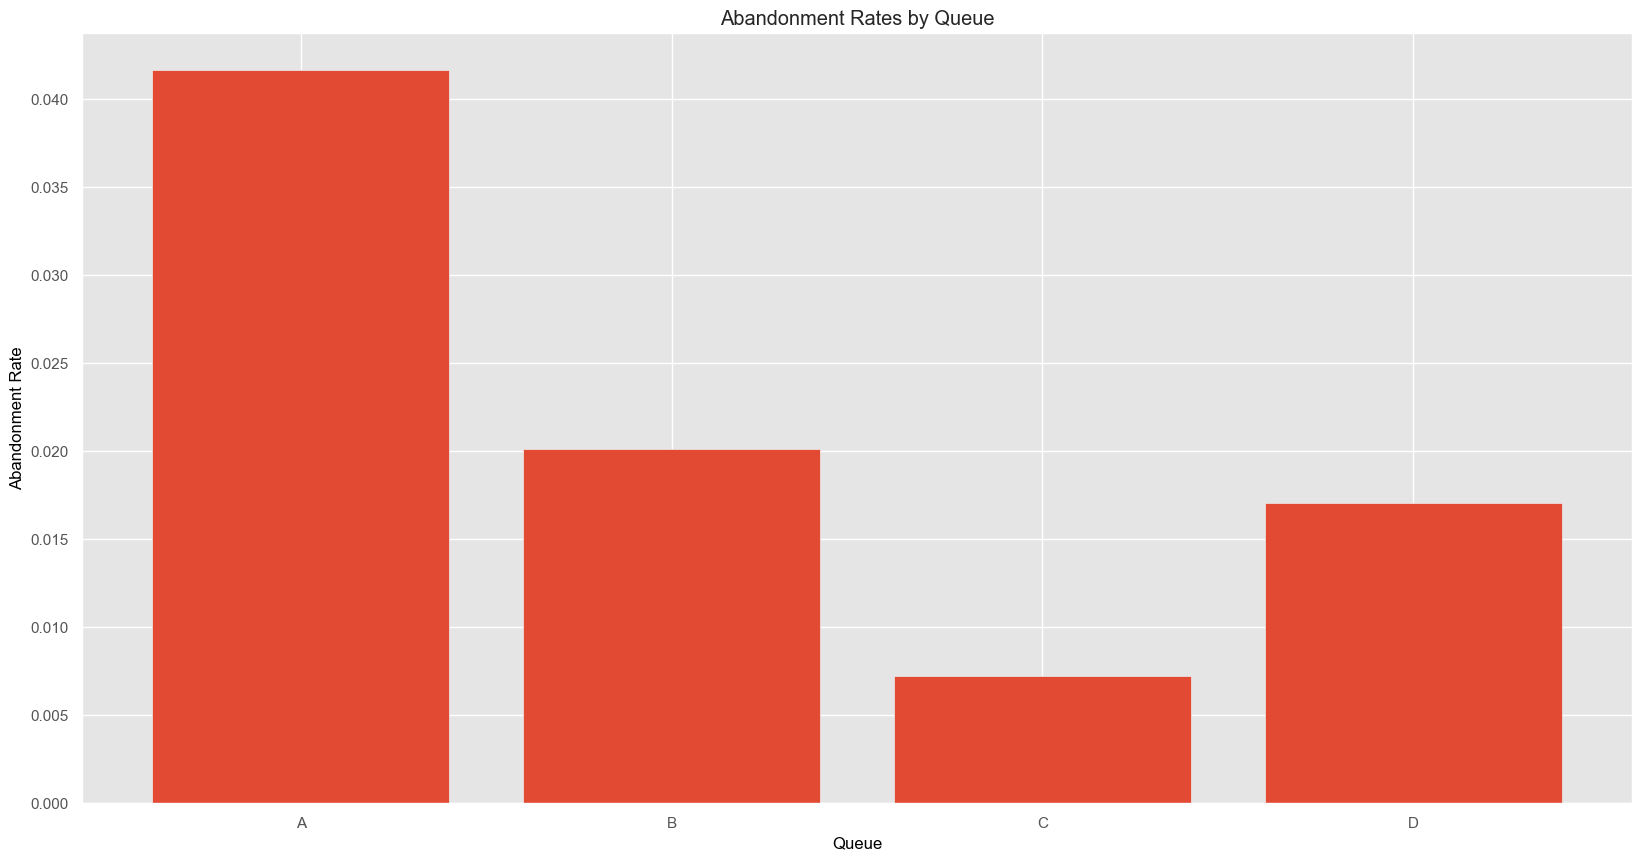

In [201]:
# Create visualization 1 here
# Import any additional libraries needed with alias

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
names = list(abandonment_rates.keys())
values = list(abandonment_rates.values())
plt.bar(names, values)

plt.xlabel('Queue', color = 'black')
plt.ylabel('Abandonment Rate', color = 'black')
plt.title("Abandonment Rates by Queue")
plt.show()



#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: So I have a few options here. My first instinct is to use two charts, one for each variable. This would make sense if the "Y-axis" is widely skewed (and it is).  need to see how the data prints out. 

I chose a stacked chart for comparison of quick calls to total calls because it looks fabulous. I chose a standard bar graph to compare service level percentages. 

   Rep ID  Incoming Wait Time
0  Amanda            2.400000
1    Andy            3.600000
2   Brent            2.125000
3     Cam            2.909091
4    Duke            2.785714
5     Joe            3.600000
6   Lilly            3.083333
7    Todd            3.500000
8  Xander            3.333333
        Calls
Rep ID       
Amanda      3
Andy        3
Brent       6
Cam         5
Duke        6
Joe         2
Lilly       4
Todd        2
Xander      2
        Calls_x  Calls_y  Service Level %
Rep ID                                   
Amanda        3        5        60.000000
Andy          3       10        30.000000
Brent         6        8        75.000000
Cam           5       11        45.454545
Duke          6       14        42.857143
Joe           2       10        20.000000
Lilly         4       12        33.333333
Todd          2        6        33.333333
Xander        2        6        33.333333


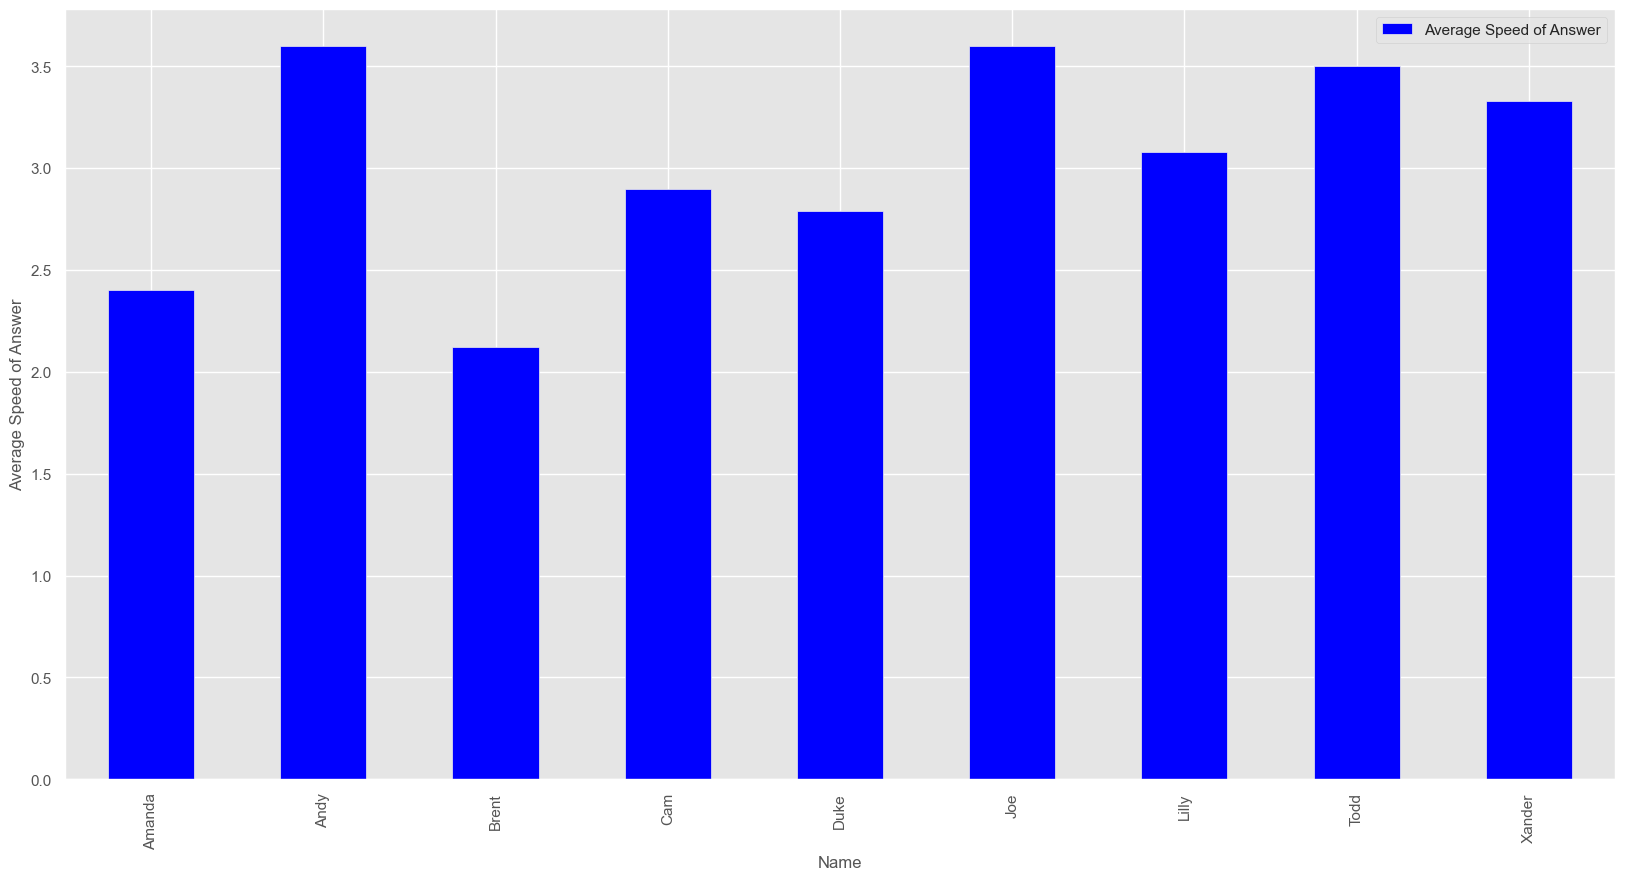

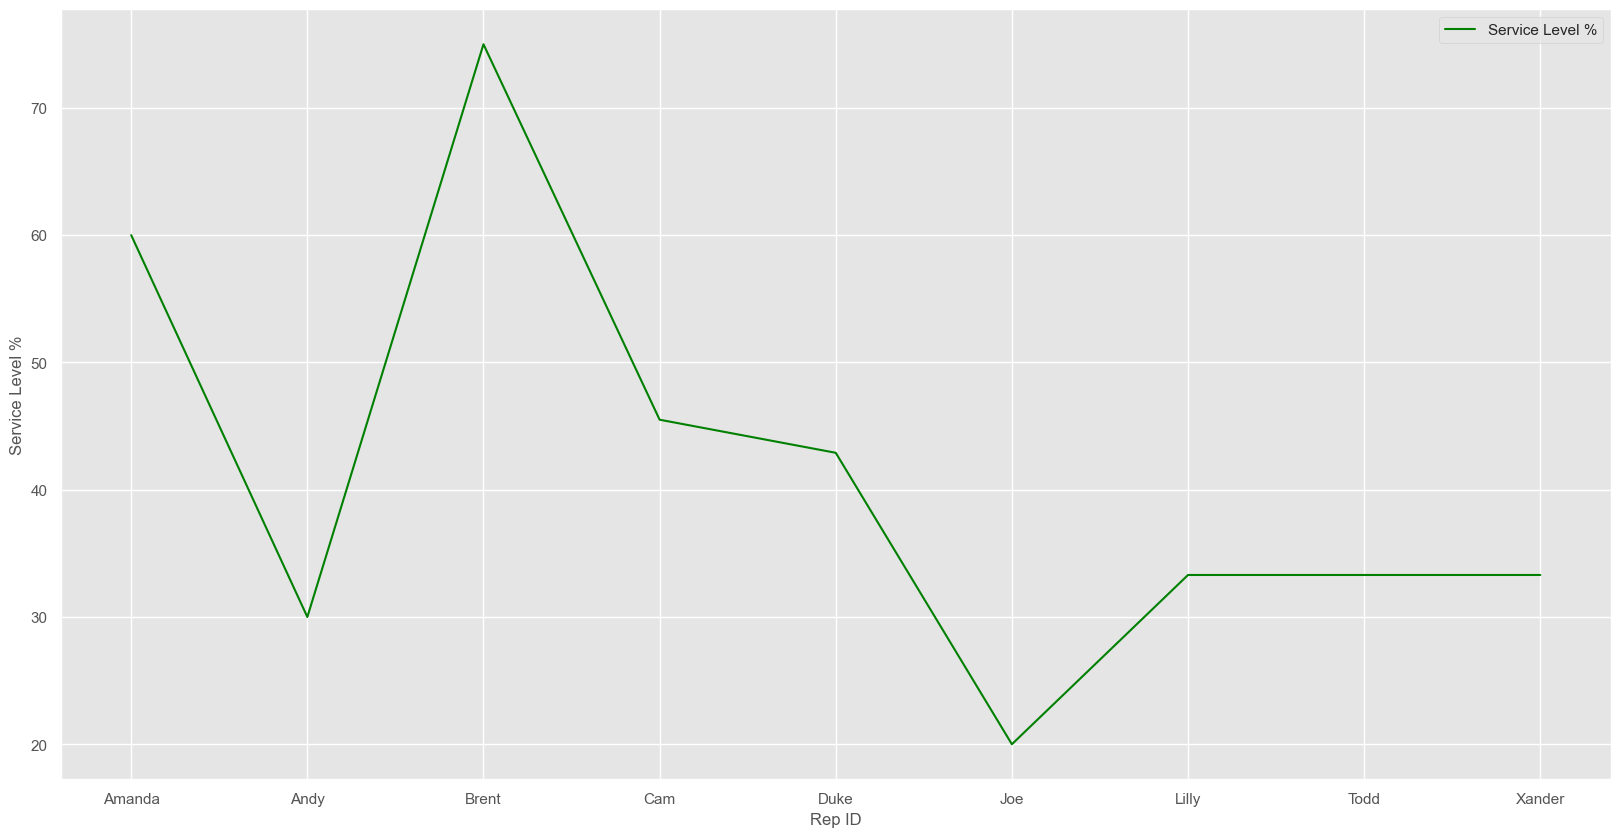

In [216]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = northdf_new.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
print (north_plt)
# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = northdf_new[northdf_new["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table
print(quick_stats)


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = northdf_new[northdf_new["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table 
# print(total_stats) 

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")


# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
print(service_level)
#Your Code Here:

avg_speed={
    "Amanda": 2.40,
"Andy": 3.60,
"Brent" :  2.12,
"Cam":  2.90,
"Duke": 2.79,
"Joe":  3.60,
"Lilly": 3.08,
"Todd":  3.50,
"Xander":  3.33
}

vis_two_df = pd.DataFrame({'Rep ID': avg_speed.keys(), 'Average Speed of Answer': avg_speed.values()})
vis_two_df.plot.bar(x='Rep ID', y='Average Speed of Answer', color = 'blue')
plt.xlabel("Name")
plt.ylabel("Average Speed of Answer")
plt.show()

sl_percents={
    "Amanda": 60,
"Andy": 30,
"Brent" :  75,
"Cam":  45.5,
"Duke": 42.9,
"Joe":  20,
"Lilly": 33.3,
"Todd":  33.3,
"Xander":  33.3
}
vis_two2_df = pd.DataFrame({'Rep ID': sl_percents.keys(), 'Service Level %': sl_percents.values()})
vis_two2_df.plot.line(x='Rep ID', y='Service Level %', color = 'green')
plt.xlabel("Rep ID")
plt.ylabel("Service Level %")
plt.show()


#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a grouped bar chart to show incoming vs outcoming calls for each call purpose. Complaints had 51 incoming and 0 outgoing. Sales Support had 75 incoming and 123 outgoing. Finally, Product Support had 82 incoming and 228 outgoing. 

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


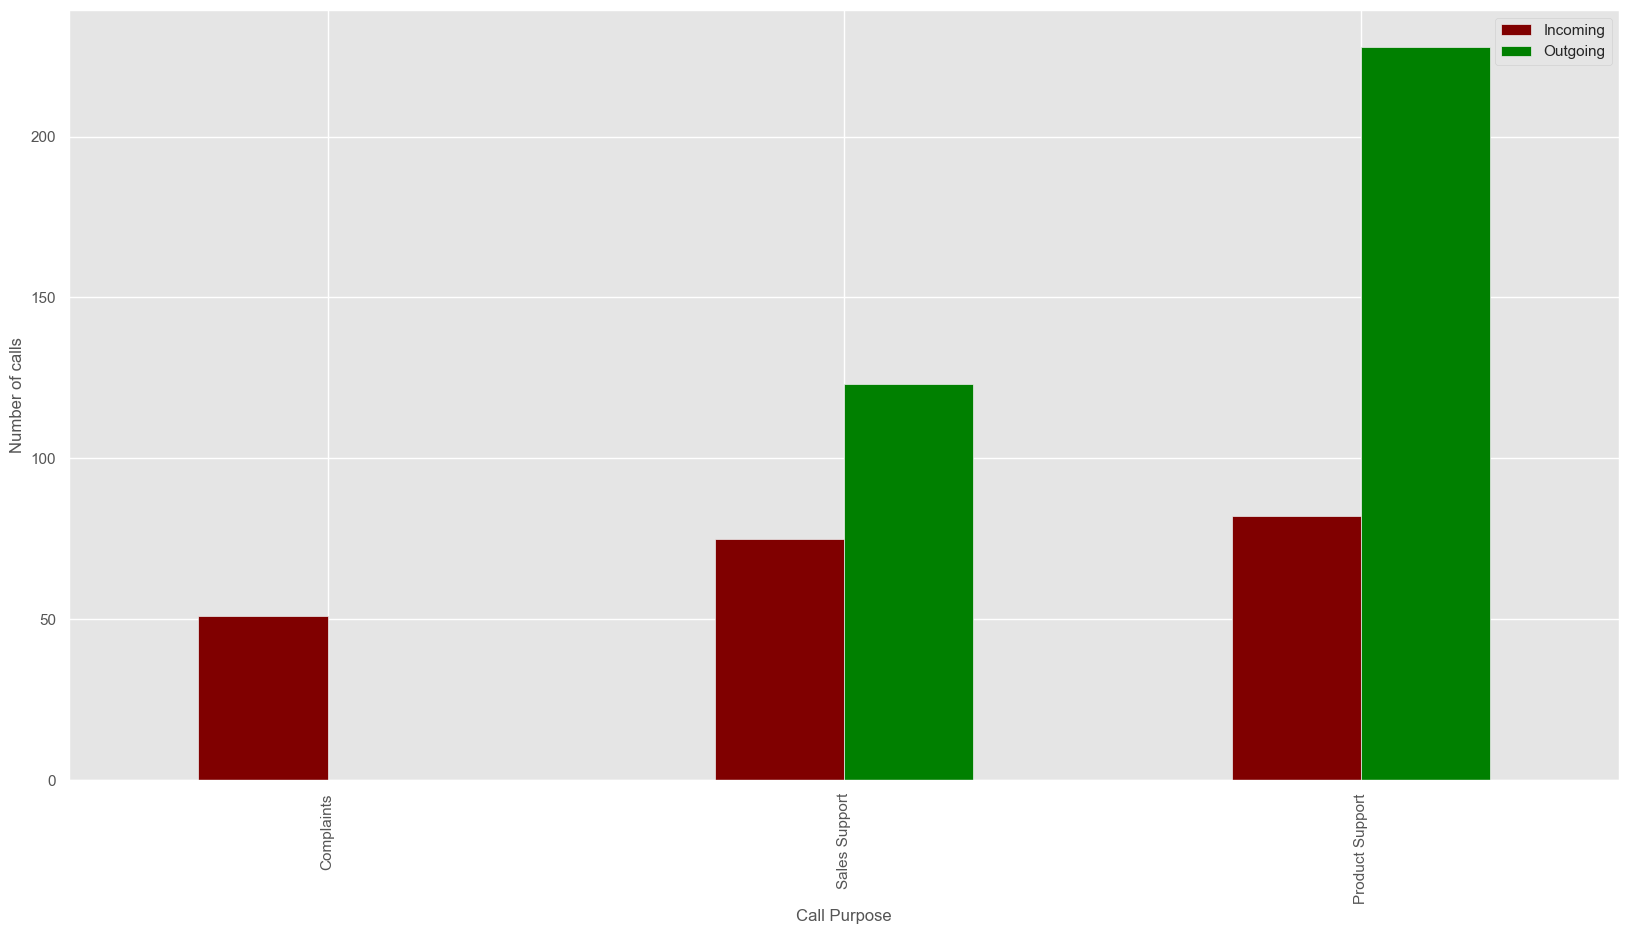

In [203]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()


#Your Code Here:
pc_summary={
    "Complaints": [51, 0],
    "Sales Support": [75, 123],
    "Product Support": [82, 228]
}

vis_three_df = pd.DataFrame(pc_summary).T
vis_three_df.plot(kind='bar', color=['maroon', 'green'])
plt.xlabel("Call Purpose")
plt.ylabel("Number of calls")
plt.legend(["Incoming", "Outgoing"])
plt.show()


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: The North Branch is operating more efficiently. First, their call abandonment averages fall into the ideal 2-5% timeframe, while the South Branch does not. Additinally, The North branch has shorter "Busy" and "During Call Wait" averages. The average speed of answer is similar with North at 3.05 seconds and the South at 3.0, however, my analysis in other categories outweighs the slight advantage the South Branch has with speed of answer. The North has a higher percentage of calls answered withink two seconds as well. 



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: In the North, the average calls per rep was 27.2, while the average calls per rep for the South Branch was 28.5. The North seems to be operating more efficiently, although the numbers for the South are in no way discoraging. If the focus it to elevate both branches to optimal efficiency, I would recommend placing the additional reps with the South branch in an effort to reduce busy minutes, during call wait time, and to ge the call abandonment percentages within the optimal range.  


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: I think dates and timestamps would have been helpful with some calcualtions. It is not clear to me if these calls all came from a single day shift. Furthermore, to truly compare branch efficiency, we would need to look at data over a variety of days to ensure decisions were being made based on trends vs single-day anomalies. Being able to compare a week's worth of data (to see daily trends) or multiple weeks comparitive data, would lead to a more responsible and data-based business decision. 


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

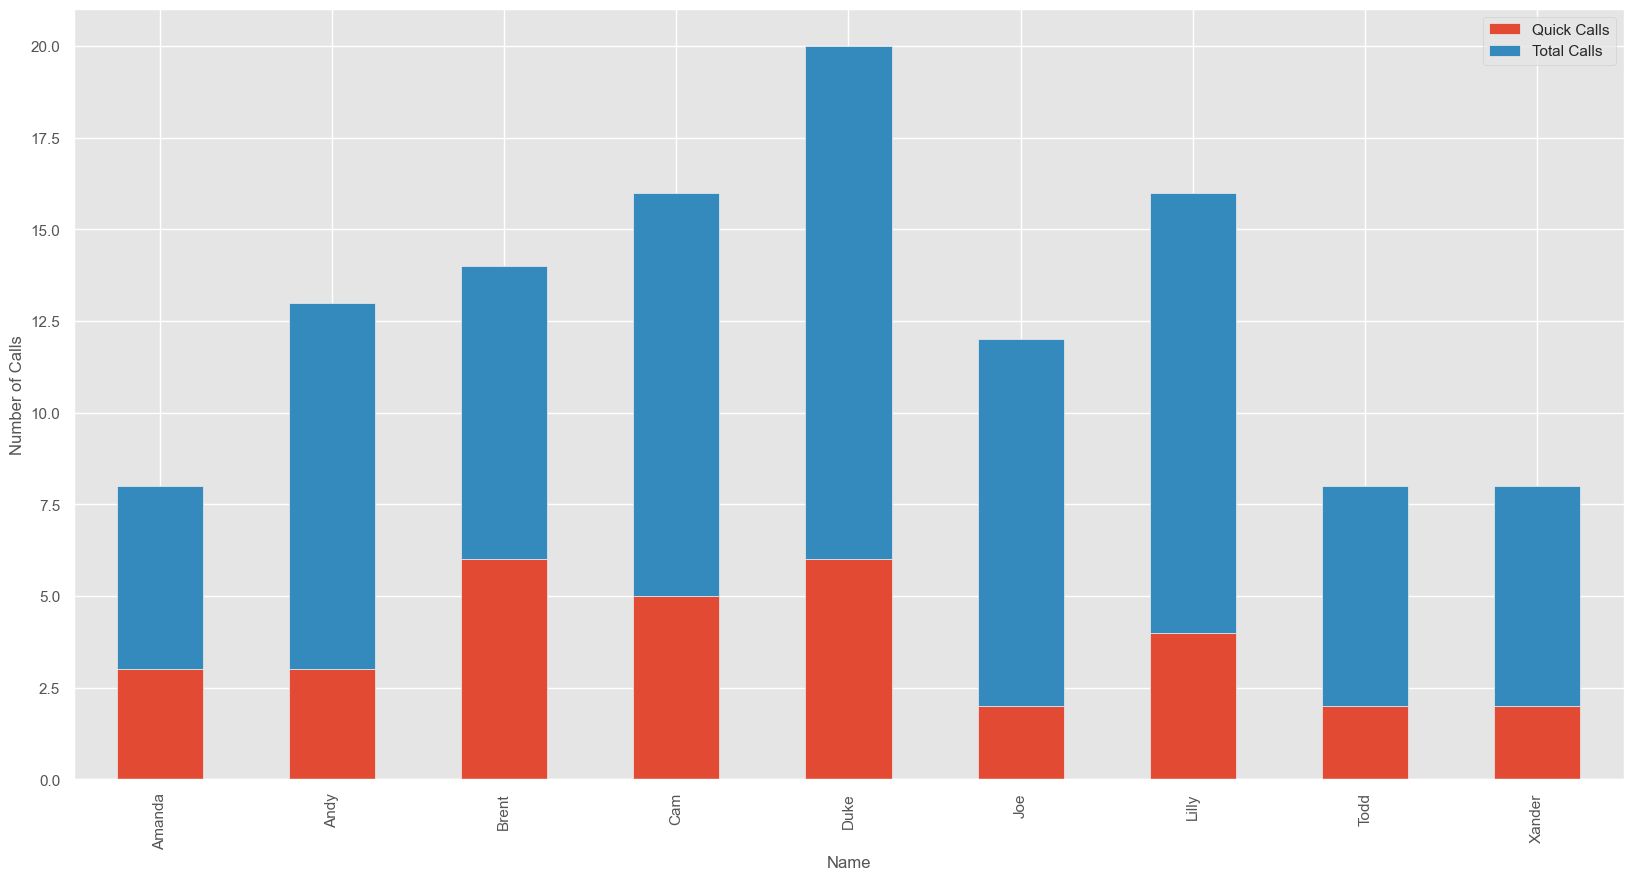

In [210]:

#I accidentally made a table where I compare the number of quick calls to the number of
#calls answered after the 2 second timeframe. It's a stacked table and I think
#it looks pretty snazzy. 

sl_calls={
    "Amanda": [3,5],
"Andy": [3,10],
"Brent" :  [6,8],
"Cam":  [5, 11],
"Duke": [6,14],
"Joe":  [2,10],
"Lilly": [4,12],
"Todd":  [2,6],
"Xander":  [2,6]
}

vis_two_df = pd.DataFrame(sl_calls).T
vis_two_df.plot.bar(stacked=True)
plt.xlabel("Name")
plt.ylabel("Number of Calls")
plt.legend(["Quick Calls", "Total Calls"])
plt.show()

In [208]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: